First, we want to create some code that will show us that the average total time for the random sampling equal across a variety of cycles and iterations.

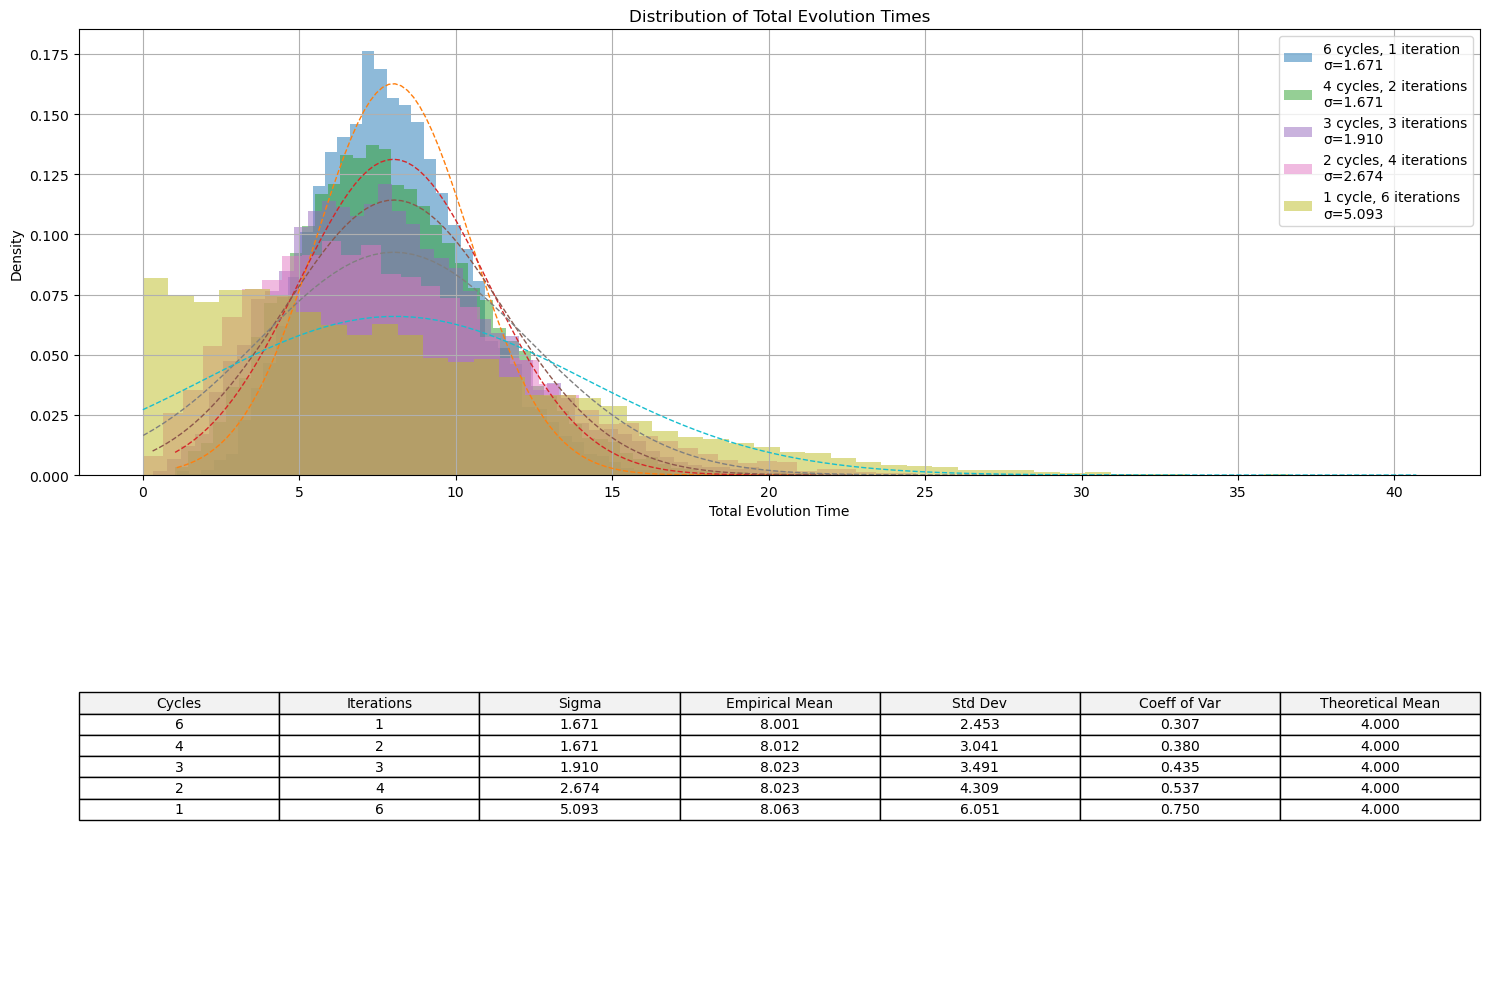


Detailed Statistics:
--------------------------------------------------------------------------------

6 cycles, 1 iteration:
Configuration: 6 cycles, 1 iterations
Required σ: 1.671
Mean total time: 8.001 (theoretical: 4.000)
Standard deviation: 2.453
Coefficient of variation: 0.307

4 cycles, 2 iterations:
Configuration: 4 cycles, 2 iterations
Required σ: 1.671
Mean total time: 8.012 (theoretical: 4.000)
Standard deviation: 3.041
Coefficient of variation: 0.380

3 cycles, 3 iterations:
Configuration: 3 cycles, 3 iterations
Required σ: 1.910
Mean total time: 8.023 (theoretical: 4.000)
Standard deviation: 3.491
Coefficient of variation: 0.435

2 cycles, 4 iterations:
Configuration: 2 cycles, 4 iterations
Required σ: 2.674
Mean total time: 8.023 (theoretical: 4.000)
Standard deviation: 4.309
Coefficient of variation: 0.537

1 cycle, 6 iterations:
Configuration: 1 cycles, 6 iterations
Required σ: 5.093
Mean total time: 8.063 (theoretical: 4.000)
Standard deviation: 6.051
Coefficient of v

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def calculate_evolution_times(n_cycles, iterations_per_cycle, sigma, n_samples=10000):
    """
    Calculate total evolution times for given number of cycles and iterations.
    Returns both the total times and the individual evolution steps for analysis.
    """
    total_times = np.zeros(n_samples)
    all_steps = []  # Store individual time steps for analysis
    
    for sample in range(n_samples):
        time = 0
        sample_steps = []
        for cycle in range(n_cycles):
            t = abs(np.random.normal(0, sigma))
            cycle_steps = []
            for i in range(iterations_per_cycle):
                step_time = t / (2**i)
                time += step_time
                cycle_steps.append(step_time)
            sample_steps.extend(cycle_steps)
        total_times[sample] = time
        all_steps.append(sample_steps)
    
    theoretical_mean = n_cycles * np.sqrt(2/np.pi) * sigma * (1 - 1/2**iterations_per_cycle)
    
    return total_times, theoretical_mean, np.array(all_steps)

def calculate_required_sigma(n_cycles, iterations, target_time):
    """Calculate required sigma to achieve target average total time."""
    return target_time / (n_cycles * np.sqrt(2/np.pi) * (1 - 1/2**iterations))

# Define combinations that demonstrate different approaches
# Format: (cycles, iterations, description)
combinations = [
    (6, 1, "6 cycles, 1 iteration"),
    (4, 2, "4 cycles, 2 iterations"),
    (3,3, "3 cycles, 3 iterations"), 
    (2, 4, "2 cycles, 4 iterations"),             
    (1, 6, "1 cycle, 6 iterations"),

]

target_time = 4.0  # Target average total time
n_samples = 10000

# Calculate and plot results
plt.figure(figsize=(15, 10))

# Plot 1: Distribution of total times
plt.subplot(2, 1, 1)
results = []
for cycles, iterations, label in combinations:
    # Calculate required sigma
    sigma = calculate_required_sigma(cycles, iterations, target_time)
    
    # Generate data
    times, theo_mean, steps = calculate_evolution_times(cycles, iterations, sigma)
    
    # Plot histogram
    plt.hist(times, bins=50, alpha=0.5, density=True, label=f"{label}\nσ={sigma:.3f}")
    
    # Fit and plot normal distribution
    mu, std = stats.norm.fit(times)
    x = np.linspace(min(times), max(times), 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, '--', linewidth=1)
    
    results.append({
        'label': label,
        'cycles': cycles,
        'iterations': iterations,
        'sigma': sigma,
        'mean': np.mean(times),
        'std': np.std(times),
        'cv': np.std(times)/np.mean(times),
        'theo_mean': theo_mean
    })

plt.xlabel('Total Evolution Time')
plt.ylabel('Density')
plt.title('Distribution of Total Evolution Times')
plt.legend()
plt.grid(True)

# Plot 2: Statistics table
plt.subplot(2, 1, 2)
plt.axis('off')

cell_text = []
for r in results:
    cell_text.append([
        f"{r['cycles']}", 
        f"{r['iterations']}", 
        f"{r['sigma']:.3f}",
        f"{r['mean']:.3f}",
        f"{r['std']:.3f}",
        f"{r['cv']:.3f}",
        f"{r['theo_mean']:.3f}"
    ])

columns = ['Cycles', 'Iterations', 'Sigma', 
           'Empirical Mean', 'Std Dev', 
           'Coeff of Var', 'Theoretical Mean']

plt.table(cellText=cell_text, colLabels=columns, 
         loc='center', cellLoc='center',
         colColours=['#f2f2f2']*len(columns))

plt.tight_layout()
plt.show()

# # Additional plot: Evolution steps distribution
# plt.figure(figsize=(12, 6))
# for cycles, iterations, label in combinations:
#     sigma = calculate_required_sigma(cycles, iterations, target_time)
#     _, _, steps = calculate_evolution_times(cycles, iterations, sigma, n_samples=100)
    
#     # Calculate mean step size for each position
#     mean_steps = np.mean(steps, axis=0)
#     std_steps = np.std(steps, axis=0)
#     x = range(1, len(mean_steps) + 1)
    
#     plt.errorbar(x, mean_steps, yerr=std_steps, fmt='o-', 
#                 label=f"{label}", alpha=0.7, capsize=5)

# plt.xlabel('Evolution Step Number')
# plt.ylabel('Average Step Size')
# plt.title('Evolution Step Sizes Across Different Approaches')
# plt.legend()
# plt.grid(True)
# plt.yscale('log')  # Log scale to better show the step size decrease
# plt.show()

# Print detailed statistics
print("\nDetailed Statistics:")
print("-" * 80)
for r in results:
    print(f"\n{r['label']}:")
    print(f"Configuration: {r['cycles']} cycles, {r['iterations']} iterations")
    print(f"Required σ: {r['sigma']:.3f}")
    print(f"Mean total time: {r['mean']:.3f} (theoretical: {r['theo_mean']:.3f})")
    print(f"Standard deviation: {r['std']:.3f}")
    print(f"Coefficient of variation: {r['cv']:.3f}")

In [11]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Parameter

def create_super_iterations(time_sample: float, iterations: int):
    times_list = np.zeros(iterations + 1)
    
    time = time_sample
    
    for i in range(0, iterations+1):
        time /= 2  # Halve the time each iteration
        times_list[i] = time
    
    return times_list


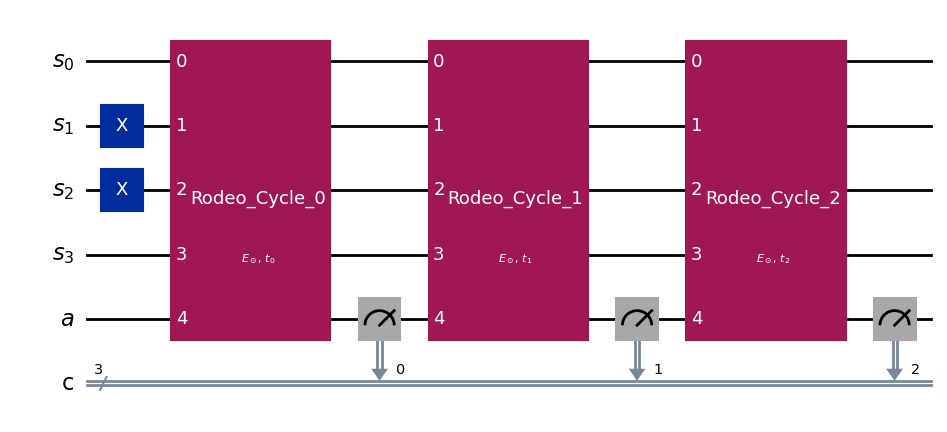

In [12]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Parameter

# # Define Fermi-Hubbard interaction gates for hopping and on-site terms
# Hopping Gate
def create_hopping_gate(J, delta_t):
    f_circ = QuantumCircuit(2)
    f_circ.h([0, 1])
    f_circ.s([0, 1])
    f_circ.h([0, 1])
    f_circ.cx(0, 1)
    f_circ.h(1)
    f_circ.z(1)
    f_circ.s([0, 1])
    f_circ.h([0, 1])
    f_gate = f_circ.to_gate(label='F_gate')
    
    g_circ = QuantumCircuit(2)
    g_circ.h([0, 1])
    g_circ.z(0)
    g_circ.s([0, 1])
    g_circ.h(1)
    g_circ.cx(0, 1)
    g_circ.h([0, 1])
    g_circ.z([0, 1])
    g_circ.s([0, 1])
    g_circ.h([0, 1])
    g_gate = g_circ.to_gate(label='G_gate')

    # The code below created a factor of 2 off
    # hop_circ = QuantumCircuit(2)
    # hop_circ.append(f_gate, [0, 1])
    # hop_circ.ry((J * delta_t) / 2, 0)
    # hop_circ.ry((-1*J * delta_t) / 2, 1)
    # hop_circ.append(g_gate, [0, 1])

    hop_circ = QuantumCircuit(2)
    hop_circ.append(f_gate, [0, 1])
    hop_circ.ry((J * delta_t), 0)
    hop_circ.ry((-1*J * delta_t), 1)
    hop_circ.append(g_gate, [0, 1])
    return hop_circ.to_gate(label=fr"A_gate_{J}")

# On-site interaction gate
def create_onsite_gate(U, delta_t):
    onsite_circ = QuantumCircuit(2)
    onsite_circ.cx(0, 1)
    onsite_circ.rz(2*U * delta_t, 1)
    onsite_circ.cx(0, 1)
    return onsite_circ.to_gate(label=fr"B_gate_{U}")

# Define the rodeo cycle
def rodeo_cycle(num_sites, J_value, U_value, t: Parameter, r, targ: Parameter):
    beta = t / r  # Parameter for rotation gates
    num_qubits = num_sites * 2  # Each site has two qubits (spin-up and spin-down)

    # Define quantum registers
    sys = QuantumRegister(num_qubits, 's')
    aux = QuantumRegister(1, 'a')
    qc = QuantumCircuit(sys, aux)

    # Apply Hadamard on the auxiliary qubit to create superposition
    qc.h(aux[0])

    # Trotter evolution within this single Rodeo cycle
    A_gate = create_hopping_gate(J=-J_value, delta_t=beta)
    # A_gate = create_hopping_gate(J=-2*J_value, delta_t=beta)
    B_gate = create_onsite_gate(U=U_value, delta_t=beta)

    qc.cz([sys[0], sys[1]], aux[0])
    for _ in range(r):
    
        # qc.cz([sys[0], sys[1]], aux[0])
        # Apply A_gate for hopping terms on nearest neighbors for spin-up qubits
        for site in range(0, num_sites - 1, 2):  # Even sites for spin-up qubits
            spin_up_qubit_1 = site * 2
            spin_up_qubit_2 = (site + 1) * 2
            qc.append(A_gate, [spin_up_qubit_1, spin_up_qubit_2])

        for site in range(1, num_sites - 1, 2):  # Odd sites for spin-up qubits
            spin_up_qubit_1 = site * 2
            spin_up_qubit_2 = (site + 1) * 2
            qc.append(A_gate, [spin_up_qubit_1, spin_up_qubit_2])

        # Apply A_gate for hopping terms on nearest neighbors for spin-down qubits
        for site in range(0, num_sites - 1, 2):  # Even sites for spin-down qubits
            spin_down_qubit_1 = site * 2 + 1
            spin_down_qubit_2 = (site + 1) * 2 + 1
            qc.append(A_gate, [spin_down_qubit_1, spin_down_qubit_2])

        for site in range(1, num_sites - 1, 2):  # Odd sites for spin-down qubits
            spin_down_qubit_1 = site * 2 + 1
            spin_down_qubit_2 = (site + 1) * 2 + 1
            qc.append(A_gate, [spin_down_qubit_1, spin_down_qubit_2])

        # qc.cz([sys[0], sys[1]], aux[0])

        # Add CX gates for every other system qubit
        for i in range(0, num_qubits, 4):
            qc.cx(aux[0], sys[i])  # Controlled X on selected system qubits
            if i + 2 < num_qubits:
                qc.cx(aux[0], sys[i + 2])

        # Apply B_gate for on-site interactions on each site
        for site in range(num_sites):
            spin_up_qubit = site * 2
            spin_down_qubit = site * 2 + 1
            qc.append(B_gate, [spin_up_qubit, spin_down_qubit])

        # # Add CX gates for every other system qubit again
        for i in range(0, num_qubits, 4):
            qc.cx(aux[0], sys[i])  # Controlled X on selected system qubits
            if i + 2 < num_qubits:
                qc.cx(aux[0], sys[i + 2])
        
    qc.cz([sys[0], sys[1]], aux[0])


    # Phase rotation based on the energy target and time sample
    qc.p(2*targ * t, aux[0])
    qc.h(aux[0])

    return qc

def create_super_iterations(time_sample: float, iterations: int):
    times_list = np.zeros(iterations + 1)
    
    time = time_sample
    
    for i in range(0, iterations+1):
        time /= 2  # Halve the time each iteration
        times_list[i] = time
    
    return times_list

# Define circuit parameters
num_sites = 2
J_input = 4.0
U_input = 1.0

# Initialize cycling parameters
cycles = 3
iterations = 0

# Initialize Qiskit parameters
target = Parameter(r'$E_\odot$')
time = [Parameter(fr'$t_{i}$') for i in range(cycles)]
si_time = [Parameter(fr'$st_{j}$') for j in range(cycles * iterations)]
steps = 5

# Create registers and circuit
classical = ClassicalRegister(cycles * (1 + iterations), 'c')
aux = QuantumRegister(1, 'a')
sys = QuantumRegister(num_sites * 2, 's')
circuit = QuantumCircuit(sys, aux, classical)

circuit.x([sys[1], sys[2]])

# Create circuit with alternating rodeo cycles and super iterations
classical_idx = 0
super_idx = 0 

for j in range(cycles):
    rodeo_gate = rodeo_cycle(num_sites=num_sites, J_value=J_input, U_value=U_input, t=time[j], r=steps, targ=target)
    circuit.append(rodeo_gate.to_gate(label=fr'Rodeo_Cycle_{j}'), range(num_sites * 2 + 1))
    circuit.measure(aux, classical[classical_idx])
    classical_idx += 1 

    # Add super iteration cycles with si_time
    for k in range(iterations):
        rodeo_gate_si = rodeo_cycle(num_sites=num_sites, J_value=J_input, U_value=U_input, t=si_time[super_idx], r=steps, targ=target)
        circuit.append(rodeo_gate_si.to_gate(label=fr'SI_Rodeo_Cycle_{j}_{k}'), range(num_sites * 2 + 1))
        circuit.measure(aux, classical[classical_idx])
        classical_idx += 1 
        super_idx += 1 

# Draw the circuit
circuit.draw('mpl')



In [23]:
def generate_superiteration_times(tsamples, superiterations, si_time):

    # Validate the size of si_time
    if len(si_time) < len(tsamples) * superiterations:
        raise ValueError("Insufficient si_time parameters for the given cycles and superiterations.")
    
    superiteration_parameter_binds = {}
    

    for i in range(len(tsamples)):

        superiteration_times = []
        time = tsamples[i]
        for _ in range(superiterations):
            time /= 2
            superiteration_times.append(time)
        
        for j in range(superiterations):
            si_index = i * superiterations + j
            superiteration_parameter_binds[si_time[si_index]] = superiteration_times[j]
    
    return superiteration_parameter_binds

In [24]:
from qiskit_aer.primitives import Sampler
import numpy as np
from tqdm import tqdm

# Setup parameters
iterations_list = [1,2,3,4,6]
cycles_list = [6,4,3,2,1]
sigma = [1.671, 1.671, 1.910, 2.674, 5.093]

# Define inter-peak regions
range1 = np.arange(-6, 0.1, 0.1)
range2 = np.arange(3.5, 6.1, 0.1)
targetenergies = np.concatenate([range1, range2])

# Parameters for sampling
timeresamples = 10
shots_per_same_time = [16, 32, 64, 128, 256, 512, 1024]

# Circuit parameters
num_sites = 2
J_input = 4.0
U_input = 1.0

# Initialize results storage
# Modified parameter setup
combinations = list(zip(cycles_list, iterations_list, sigma))
results = []

# Process each combination
for cycles, iterations, sigma_val in combinations:
    # Lists to store probabilities for all energies at this (cycles, iterations)
    all_probabilities = {}  # Dictionary keyed by shots
    
    for shots in shots_per_same_time:
        all_probabilities[shots] = []
        
        # Initialize circuit parameters as before...
        target = Parameter(r'$E_\odot$')
        time = [Parameter(fr'$t_{i}$') for i in range(cycles)]
        si_time = [Parameter(fr'$st_{j}$') for j in range(cycles * iterations)]
        
        # Circuit setup remains the same...
        # ... [Previous circuit initialization code]
        
        print(f"\nExecuting for {cycles} cycles, {iterations} iterations, {shots} shots:")
        for energy in tqdm(targetenergies, desc="Processing energies", ncols=100):
            targ_energy = {target: energy}
            
            probabilities_0 = []
            for _ in range(timeresamples):
                # Use the sigma value from the combination
                tsamples = ((1 / sigma_val) * np.random.randn(cycles)).tolist()
                time_parameters = dict(zip(time, tsamples))
                superiteration_parameters = generate_superiteration_times(tsamples, 
                                                                       superiterations=iterations,
                                                                       si_time=si_time)

                # Circuit execution remains the same...
                circuit1 = circuit.assign_parameters(time_parameters, inplace=False)
                circuit2 = circuit1.assign_parameters(targ_energy, inplace=False)
                circuit3 = circuit2.assign_parameters(superiteration_parameters, inplace=False)
                
                # Update sampler to use specified shots
                sampler = Sampler()
                result = sampler.run(circuit3, shots=shots).result()
                quasi_dists = result.quasi_dists
                
                for dist in quasi_dists:
                    probabilities_0.append(dist.get(0, 0))
            
            avg_prob_0 = np.mean(probabilities_0)
            all_probabilities[shots].append(avg_prob_0)
        
        # Store results for each shot count
        results.append({
            'cycles': cycles,
            'iterations': iterations,
            'sigma': sigma_val,
            'shots': shots,
            'max_probability': np.max(all_probabilities[shots]),
            'mean_probability': np.mean(all_probabilities[shots])
        })


Executing for 6 cycles, 1 iterations, 16 shots:


Processing energies:   0%|                                                   | 0/87 [00:00<?, ?it/s]


CircuitError: 'Cannot bind parameters ($t_1$, $t_4$, $t_5$, $t_0$, $t_3$, $t_2$) not present in the circuit.'